# **Practice for uncleaned data**

In [1]:
!pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
path = r"C:\Users\bbuser\Desktop\DataScience-Brain-Bytes\Team_members\from_Hajer\data\surat_uncleaned.csv"
df = pd.read_csv(path)
df

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,description,price_per_sqft,price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,West,"Luxury project with basement parking, Solar ro...","₹2,891 per sqft",₹33.8 Lac
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,2 And 3 BHK Luxurious Flat for Sell In New Alt...,"₹3,551 per sqft",₹45.4 Lac
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173 sqft,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,This affordable 2 BHK flat is situated along a...,"₹3,800 per sqft",₹44.6 Lac
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700 sqft,New Property,Ready to Move,6 out of 14,Unfurnished,East,2 BHK Flat For sell IN Jahangirabad Prime Loca...,"₹3,966 per sqft",₹47 Lac
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250 sqft,Orchid Fantasia,New Property,Unfurnished,2,2,"Multistorey Apartment for Sale in Palanpur, Su...","₹3,600 per sqft",₹45 Lac
...,...,...,...,...,...,...,...,...,...,...,...
4520,6 BHK Apartment for Sale in Millionaires Lifes...,Carpet Area,2000 sqft,New Property,Poss. by Dec '26,5 out of 12,Unfurnished,South - East,"Check out Millionaires Lifestyle in Vesu, one ...",NaN,Call for Price
4521,"4 BHK Apartment for Sale in Savan Superia, Alt...",Super Area,3600 sqft,New Property,Poss. by Dec '25,5 out of 16,Unfurnished,South - East,Superia is a premium residential project launc...,NaN,Call for Price
4522,5 BHK Apartment for Sale in Roongta Green Vall...,Carpet Area,2250 sqft,New Property,Poss. by Dec '25,7 out of 13,Unfurnished,North - East,"When it comes to beautiful homes, nothing beat...",NaN,Call for Price
4523,"6 BHK Apartment for Sale in Cellestial Dreams,...",Carpet Area,3450 sqft,New Property,Ready to Move,7 out of 18,Unfurnished,North - West,"DRB Ravani Cellestial Dreams in Vesu, Surat is...",NaN,Call for Price


# **Exploraty for the dataset (EDA)**

In [4]:
df.columns

Index(['property_name', 'areaWithType', 'square_feet', 'transaction', 'status',
       'floor', 'furnishing', 'facing', 'description', 'price_per_sqft',
       'price'],
      dtype='object')

In [5]:
df.describe()

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,description,price_per_sqft,price
count,4525,4525,4525,4421,4524,4480,4185,3936,3154,4157,4525
unique,1992,6,1399,38,138,222,78,176,2588,2134,841
top,3 BHK Apartment for Sale in Vesu Surat,Super Area,1000 sqft,Resale,Ready to Move,Resale,Unfurnished,East,Multistorey apartment is available for sale. I...,"₹5,000 per sqft",Call for Price
freq,93,2599,77,2197,3078,431,2322,1487,35,64,173


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4525 entries, 0 to 4524
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   property_name   4525 non-null   object
 1   areaWithType    4525 non-null   object
 2   square_feet     4525 non-null   object
 3   transaction     4421 non-null   object
 4   status          4524 non-null   object
 5   floor           4480 non-null   object
 6   furnishing      4185 non-null   object
 7   facing          3936 non-null   object
 8   description     3154 non-null   object
 9   price_per_sqft  4157 non-null   object
 10  price           4525 non-null   object
dtypes: object(11)
memory usage: 389.0+ KB


In [7]:
df.shape

(4525, 11)

In [8]:
df.columns.tolist()

['property_name',
 'areaWithType',
 'square_feet',
 'transaction',
 'status',
 'floor',
 'furnishing',
 'facing',
 'description',
 'price_per_sqft',
 'price']

In [9]:
df = df.drop( 'description', axis=1)

In [10]:
df.index

RangeIndex(start=0, stop=4525, step=1)

In [11]:
df.dtypes

property_name     object
areaWithType      object
square_feet       object
transaction       object
status            object
floor             object
furnishing        object
facing            object
price_per_sqft    object
price             object
dtype: object

In [12]:
df.head(50)

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,price_per_sqft,price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,West,"₹2,891 per sqft",₹33.8 Lac
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,"₹3,551 per sqft",₹45.4 Lac
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173 sqft,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,"₹3,800 per sqft",₹44.6 Lac
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700 sqft,New Property,Ready to Move,6 out of 14,Unfurnished,East,"₹3,966 per sqft",₹47 Lac
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250 sqft,Orchid Fantasia,New Property,Unfurnished,2,2,"₹3,600 per sqft",₹45 Lac
5,"2 BHK Apartment for Sale in Anand Aspire, Jaha...",Super Area,1265 sqft,Unfurnished,Poss. by Dec '25,New Property,Anand Aspire,2,"₹3,411 per sqft",₹43.2 Lac
6,3 BHK Villa for Sale in Dindoli Surat,Carpet Area,1404 sqft,Unfurnished,Poss. by Jun '24,New Property,East,Main Road,NaN,₹42.1 Lac
7,Office Space for Sale in Vesu Surat,Carpet Area,700 sqft,New Property,Poss. by Sep '25,7 out of 10,1,NaN,"₹3,392 per sqft",₹44.1 Lac
8,"2 BHK Apartment for Sale in Orchid Gardenia, P...",Super Area,1180 sqft,Orchid Gardenia,New Property,Unfurnished,2,2,"₹3,751 per sqft",₹44.3 Lac
9,2 BHK Apartment for Sale in Palanpur Surat,Carpet Area,720 sqft,New Property,Poss. by Dec '25,3 out of 14,Unfurnished,East,"₹3,200 per sqft",₹40 Lac


In [13]:
df.tail()

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,price_per_sqft,price
4520,6 BHK Apartment for Sale in Millionaires Lifes...,Carpet Area,2000 sqft,New Property,Poss. by Dec '26,5 out of 12,Unfurnished,South - East,NaN,Call for Price
4521,"4 BHK Apartment for Sale in Savan Superia, Alt...",Super Area,3600 sqft,New Property,Poss. by Dec '25,5 out of 16,Unfurnished,South - East,NaN,Call for Price
4522,5 BHK Apartment for Sale in Roongta Green Vall...,Carpet Area,2250 sqft,New Property,Poss. by Dec '25,7 out of 13,Unfurnished,North - East,NaN,Call for Price
4523,"6 BHK Apartment for Sale in Cellestial Dreams,...",Carpet Area,3450 sqft,New Property,Ready to Move,7 out of 18,Unfurnished,North - West,NaN,Call for Price
4524,4 BHK Apartment for Sale in Roongta Green Vall...,Super Area,4500 sqft,New Property,Ready to Move,3 out of 12,Unfurnished,North,NaN,Call for Price


# **Check for duplicates**

In [14]:
#To check for duplicated values
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4520    False
4521    False
4522    False
4523    False
4524    False
Length: 4525, dtype: bool

In [15]:
#To check the number of duplicated values
df.duplicated().sum()

np.int64(126)

In [16]:
#To show the duplicated raws
df[df.duplicated()]

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,price_per_sqft,price
1187,1 BHK Apartment for Sale in Pandesara Surat,Super Area,650 sqft,NaN,Ready to Move,Resale,NaN,NaN,"₹2,154 per sqft",₹14 Lac
1433,"2 BHK Apartment for Sale in Nakshatra Nebula, ...",Super Area,1219 sqft,Resale,Ready to Move,6 out of 13,Unfurnished,East,"₹3,600 per sqft",₹43.9 Lac
1511,2 BHK Apartment for Sale in NavYug College Surat,Carpet Area,1650 sqft,Resale,Ready to Move,7 out of 10,Unfurnished,East,"₹3,125 per sqft",₹50 Lac
1512,2 BHK Apartment for Sale in Adajan Surat,Super Area,847 sqft,Resale,Ready to Move,1 out of 13,Furnished,East,"₹5,903 per sqft",₹50 Lac
1535,2 BHK Apartment for Sale in Palanpur Surat,Super Area,1326 sqft,Resale,Ready to Move,9 out of 14,Unfurnished,East,"₹3,771 per sqft",₹50 Lac
...,...,...,...,...,...,...,...,...,...,...
3911,"4 BHK Apartment for Sale in Empire Regency, Ve...",Carpet Area,2500 sqft,Resale,Ready to Move,10 out of 10,Furnished,North,"₹5,890 per sqft",₹2.15 Cr
4152,3 BHK Apartment for Sale in Vesu Surat,Super Area,2500 sqft,New Property,Poss. by Mar '25,7 out of 13,Unfurnished,South -West,"₹6,000 per sqft",₹1.50 Cr
4273,"3 BHK Apartment for Sale in Sky Superia, VIP R...",Super Area,2400 sqft,New Property,Ready to Move,10 out of 19,Unfurnished,East,"₹6,250 per sqft",₹1.50 Cr
4361,"4 BHK House for Sale in Someshwara Enclave, V...",Carpet Area,2000 sqft,Unfurnished,Ready to Move,Resale,East,"Garden/Park, Main Road","₹15,873 per sqft",₹1.50 Cr


In [17]:
#To remove all duplicated raws ((excluding the first occurance of the raw))
df.drop_duplicates(inplace=True)
#(inplace=True) --> to update the DataFrame directly

In [18]:
#To view the dataset after dropping duplicates
df

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,price_per_sqft,price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,West,"₹2,891 per sqft",₹33.8 Lac
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,"₹3,551 per sqft",₹45.4 Lac
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173 sqft,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,"₹3,800 per sqft",₹44.6 Lac
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700 sqft,New Property,Ready to Move,6 out of 14,Unfurnished,East,"₹3,966 per sqft",₹47 Lac
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250 sqft,Orchid Fantasia,New Property,Unfurnished,2,2,"₹3,600 per sqft",₹45 Lac
...,...,...,...,...,...,...,...,...,...,...
4520,6 BHK Apartment for Sale in Millionaires Lifes...,Carpet Area,2000 sqft,New Property,Poss. by Dec '26,5 out of 12,Unfurnished,South - East,NaN,Call for Price
4521,"4 BHK Apartment for Sale in Savan Superia, Alt...",Super Area,3600 sqft,New Property,Poss. by Dec '25,5 out of 16,Unfurnished,South - East,NaN,Call for Price
4522,5 BHK Apartment for Sale in Roongta Green Vall...,Carpet Area,2250 sqft,New Property,Poss. by Dec '25,7 out of 13,Unfurnished,North - East,NaN,Call for Price
4523,"6 BHK Apartment for Sale in Cellestial Dreams,...",Carpet Area,3450 sqft,New Property,Ready to Move,7 out of 18,Unfurnished,North - West,NaN,Call for Price


# **Check for null values**

In [19]:
df.isnull().sum()

property_name       0
areaWithType        0
square_feet         0
transaction       101
status              1
floor              45
furnishing        327
facing            559
price_per_sqft    357
price               0
dtype: int64

In [20]:
df.head(100)

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,price_per_sqft,price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,West,"₹2,891 per sqft",₹33.8 Lac
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,"₹3,551 per sqft",₹45.4 Lac
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173 sqft,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,"₹3,800 per sqft",₹44.6 Lac
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700 sqft,New Property,Ready to Move,6 out of 14,Unfurnished,East,"₹3,966 per sqft",₹47 Lac
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250 sqft,Orchid Fantasia,New Property,Unfurnished,2,2,"₹3,600 per sqft",₹45 Lac
...,...,...,...,...,...,...,...,...,...,...
95,2 BHK House for Sale in Olpad Sayan Road Surat,Super Area,1000 sqft,Resale,Ready to Move,Ground out of 1,Unfurnished,2,"₹1,600 per sqft",₹16 Lac
96,3 BHK House for Sale in Kamrej Surat,Super Area,1100 sqft,Resale,Ready to Move,Ground out of 2,Unfurnished,3,"₹2,455 per sqft",₹27 Lac
97,Shop for Sale in Adajan Surat,Carpet Area,222 sqft,Resale,Ready to Move,Ground out of 14,NaN,NaN,"₹10,162 per sqft",₹44 Lac
98,1 BHK Builder Floor for Sale in Olpad Surat,Super Area,756 sqft,Resale,Ready to Move,5 out of 5,Unfurnished,1,"₹1,984 per sqft",₹15 Lac


In [21]:
df[df['status'].isnull()]

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,price_per_sqft,price
950,House for Sale in Kamrej Surat,Transaction,Resale,NaN,NaN,NaN,NaN,NaN,NaN,₹24 Lac


In [22]:
# Now I'll use the same code , but this time I'll convert the currency (Cr to lac)
def price_in_lac_simple(price_str):
    try:
        if not isinstance(price_str, str):
            return None
        price_str = price_str.lower().replace('₹', '').strip()

        # Handle common non-numeric cases explicitly
        if 'call for price' in price_str:
            return -1  # or any other sentinel value you want

        if 'lac' in price_str and ' ' not in price_str:
            price_str = price_str.replace('lac', ' lac')
        elif 'cr' in price_str and ' ' not in price_str:
            price_str = price_str.replace('cr', ' cr')

        parts = price_str.split()
        if len(parts) != 2:
            return None

        value, unit = parts
        value = float(value)

        if unit == 'cr':
            value_lac = value * 100
        elif unit == 'lac':
            value_lac = value
        else:
            return None

        return int(round(value_lac))
    except:
        return None
df

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,price_per_sqft,price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,West,"₹2,891 per sqft",₹33.8 Lac
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,"₹3,551 per sqft",₹45.4 Lac
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173 sqft,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,"₹3,800 per sqft",₹44.6 Lac
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700 sqft,New Property,Ready to Move,6 out of 14,Unfurnished,East,"₹3,966 per sqft",₹47 Lac
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250 sqft,Orchid Fantasia,New Property,Unfurnished,2,2,"₹3,600 per sqft",₹45 Lac
...,...,...,...,...,...,...,...,...,...,...
4520,6 BHK Apartment for Sale in Millionaires Lifes...,Carpet Area,2000 sqft,New Property,Poss. by Dec '26,5 out of 12,Unfurnished,South - East,NaN,Call for Price
4521,"4 BHK Apartment for Sale in Savan Superia, Alt...",Super Area,3600 sqft,New Property,Poss. by Dec '25,5 out of 16,Unfurnished,South - East,NaN,Call for Price
4522,5 BHK Apartment for Sale in Roongta Green Vall...,Carpet Area,2250 sqft,New Property,Poss. by Dec '25,7 out of 13,Unfurnished,North - East,NaN,Call for Price
4523,"6 BHK Apartment for Sale in Cellestial Dreams,...",Carpet Area,3450 sqft,New Property,Ready to Move,7 out of 18,Unfurnished,North - West,NaN,Call for Price


In [23]:
def area_in_sqft_simple(area_str):
    try:
        if not isinstance(area_str, str):
            return None

        if 'call for price' in area_str.lower():
            return -1

        parts = area_str.lower().strip().split()
        if len(parts) != 2:
            return None

        value, unit = parts
        value = float(value)

        if unit in ['sqft', 'asft']:
            sqft = value
        elif unit == 'sqm':
            sqft = value * 10.76
        else:
            return None

        return int(round(sqft))
    except:
        return None
df

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,price_per_sqft,price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,West,"₹2,891 per sqft",₹33.8 Lac
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,"₹3,551 per sqft",₹45.4 Lac
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173 sqft,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,"₹3,800 per sqft",₹44.6 Lac
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700 sqft,New Property,Ready to Move,6 out of 14,Unfurnished,East,"₹3,966 per sqft",₹47 Lac
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250 sqft,Orchid Fantasia,New Property,Unfurnished,2,2,"₹3,600 per sqft",₹45 Lac
...,...,...,...,...,...,...,...,...,...,...
4520,6 BHK Apartment for Sale in Millionaires Lifes...,Carpet Area,2000 sqft,New Property,Poss. by Dec '26,5 out of 12,Unfurnished,South - East,NaN,Call for Price
4521,"4 BHK Apartment for Sale in Savan Superia, Alt...",Super Area,3600 sqft,New Property,Poss. by Dec '25,5 out of 16,Unfurnished,South - East,NaN,Call for Price
4522,5 BHK Apartment for Sale in Roongta Green Vall...,Carpet Area,2250 sqft,New Property,Poss. by Dec '25,7 out of 13,Unfurnished,North - East,NaN,Call for Price
4523,"6 BHK Apartment for Sale in Cellestial Dreams,...",Carpet Area,3450 sqft,New Property,Ready to Move,7 out of 18,Unfurnished,North - West,NaN,Call for Price


In [24]:
df.isnull().sum()

property_name       0
areaWithType        0
square_feet         0
transaction       101
status              1
floor              45
furnishing        327
facing            559
price_per_sqft    357
price               0
dtype: int64

# **Working on null values**

## **1.Status**

In [25]:
#Since the describe table shows that (Ready to Move) is the most frequent value(Mode) , I'll just replace the null value with it
df['status'].fillna(df['status'].mode()[0], inplace=True)

C:\Users\bbuser\AppData\Local\Temp\ipykernel_9812\3116050074.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['status'].fillna(df['status'].mode()[0], inplace=True)


In [26]:
df.isnull().sum()

property_name       0
areaWithType        0
square_feet         0
transaction       101
status              0
floor              45
furnishing        327
facing            559
price_per_sqft    357
price               0
dtype: int64

## **2."price_lac" , "price" and "price_per_sqft"**

In [27]:
df.dtypes

property_name     object
areaWithType      object
square_feet       object
transaction       object
status            object
floor             object
furnishing        object
facing            object
price_per_sqft    object
price             object
dtype: object

In [28]:
df

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,price_per_sqft,price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,West,"₹2,891 per sqft",₹33.8 Lac
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,"₹3,551 per sqft",₹45.4 Lac
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173 sqft,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,"₹3,800 per sqft",₹44.6 Lac
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700 sqft,New Property,Ready to Move,6 out of 14,Unfurnished,East,"₹3,966 per sqft",₹47 Lac
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250 sqft,Orchid Fantasia,New Property,Unfurnished,2,2,"₹3,600 per sqft",₹45 Lac
...,...,...,...,...,...,...,...,...,...,...
4520,6 BHK Apartment for Sale in Millionaires Lifes...,Carpet Area,2000 sqft,New Property,Poss. by Dec '26,5 out of 12,Unfurnished,South - East,NaN,Call for Price
4521,"4 BHK Apartment for Sale in Savan Superia, Alt...",Super Area,3600 sqft,New Property,Poss. by Dec '25,5 out of 16,Unfurnished,South - East,NaN,Call for Price
4522,5 BHK Apartment for Sale in Roongta Green Vall...,Carpet Area,2250 sqft,New Property,Poss. by Dec '25,7 out of 13,Unfurnished,North - East,NaN,Call for Price
4523,"6 BHK Apartment for Sale in Cellestial Dreams,...",Carpet Area,3450 sqft,New Property,Ready to Move,7 out of 18,Unfurnished,North - West,NaN,Call for Price


In [29]:
df.isnull().sum()

property_name       0
areaWithType        0
square_feet         0
transaction       101
status              0
floor              45
furnishing        327
facing            559
price_per_sqft    357
price               0
dtype: int64

### **2.1 Price**

In [30]:
#To show all values in the column
df['price'].unique() 

array(['₹33.8 Lac ', '₹45.4 Lac ', '₹44.6 Lac ', '₹47 Lac ', '₹45 Lac ',
       '₹43.2 Lac ', '₹42.1 Lac ', '₹44.1 Lac ', '₹44.3 Lac ', '₹40 Lac ',
       '₹44 Lac ', '₹12.5 Lac ', '₹50 Lac ', '₹35.8 Lac ', '₹26.5 Lac ',
       '₹42 Lac ', '₹43 Lac ', '₹20 Lac ', '₹37 Lac ', '₹29 Lac ',
       '₹38 Lac ', '₹13 Lac ', '₹46.5 Lac ', '₹41.6 Lac ', '₹33.5 Lac ',
       '₹42.5 Lac ', '₹48 Lac ', '₹32 Lac ', '₹35 Lac ', '₹46.2 Lac ',
       '₹38.5 Lac ', '₹23 Lac ', '₹24 Lac ', '₹28 Lac ', '₹35.7 Lac ',
       '₹36.5 Lac ', '₹36 Lac ', '₹43.6 Lac ', '₹25 Lac ', '₹41 Lac ',
       '₹28.5 Lac ', '₹9 Lac ', '₹30 Lac ', '₹39.5 Lac ', '₹21.5 Lac ',
       '₹10.5 Lac ', '₹18 Lac ', '₹10 Lac ', '₹23.5 Lac ', '₹16.3 Lac ',
       '₹13.5 Lac ', '₹49 Lac ', '₹21 Lac ', '₹39 Lac ', '₹16 Lac ',
       '₹27 Lac ', '₹15 Lac ', '₹39.9 Lac ', '₹7.5 Lac ', '₹12.8 Lac ',
       '₹9.5 Lac ', '₹31.5 Lac ', '₹46 Lac ', '₹6 Lac ', '₹34 Lac ',
       '₹22 Lac ', '₹19 Lac ', '₹8.5 Lac ', '₹11 Lac ', '₹16.5 Lac ',
 

In [31]:
#To show the NaN in the column
df[df['price'].isnull()]

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,price_per_sqft,price


In [32]:
#Fill price NaN with the mean
mean_pps = df['price_per_sqft'].astype(str).str.replace(',', '').str.extract(r'([\d.]+)')[0].astype(float).mean()
df['price_per_sqft'] = df['price_per_sqft'].astype(str).str.replace(',', '').str.extract(r'([\d.]+)')[0].astype(float).fillna(mean_pps)

In [33]:
df.isnull().sum()

property_name       0
areaWithType        0
square_feet         0
transaction       101
status              0
floor              45
furnishing        327
facing            559
price_per_sqft      0
price               0
dtype: int64

## **3. Floor**

In [34]:
#Since the describe table shows that (Resale) is the most frequent value(Mode) , I'll just replace the null value with it
df['floor'].fillna(df['floor'].mode()[0], inplace=True)

C:\Users\bbuser\AppData\Local\Temp\ipykernel_9812\958918770.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floor'].fillna(df['floor'].mode()[0], inplace=True)


In [35]:
df.isnull().sum()

property_name       0
areaWithType        0
square_feet         0
transaction       101
status              0
floor               0
furnishing        327
facing            559
price_per_sqft      0
price               0
dtype: int64

## **5. Furnishing**

In [36]:
# To view al values in the column
df['furnishing'].unique()

array(['Unfurnished', 'Semi-Furnished', '2', 'Anand Aspire', 'East', '1',
       'Furnished', nan, '3', '1 Covered,', '2 Covered', '1 Covered',
       'Freehold', 'West', '26 Covered', 'Main Road', 'No', 'North',
       '1 Open', '6', 'Co-operative Society', '> 10', '4',
       'Nilkanth Seven Homes', 'Aagam Navkar', '10 Open',
       'Vinayak Enclave', '5 Covered,', 'South -West',
       'Pool, Garden/Park, Main Road', 'Garden/Park, Main Road', '7 m',
       '30 m', '50 Covered,', 'South', '12 m', 'Yes', 'Gruham Luxuria',
       '2 Covered,', 'Congo', 'Prayosha Shine', 'North - East',
       'Vaishnodevi Ideal Homes', 'Santvan Lexon', 'Sangini Epitome',
       '100 Covered', 'Nirvana Gladiolus', '7', '5 Covered', '5',
       'Raghuvir Spalex', '50 Open', 'South - East', 'North - West',
       '20 m', '20 Open', 'Garden/Park', '10 m', 'Sattvam',
       'Pramukh Amaya', 'Sun Sarvam', '3 Covered', '2 Open', '6 m',
       'Avadh Kimberly', 'Happy Glorious', 'DMD Aura', 'Freedom Tower',
  

In [37]:
#To view all th null values in the column
df[df['furnishing'].isnull()]

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,price_per_sqft,price
16,Shop for Sale in Moti Begumwadi Surat,Carpet Area,180 sqft,Resale,Ready to Move,3 out of 3,NaN,NaN,14728.000000,₹26.5 Lac
24,Shop for Sale in Ghod Dod Road Surat,Carpet Area,350 sqft,Resale,Ready to Move,Lower Basement out of 7,NaN,NaN,12857.000000,₹45 Lac
38,Shop for Sale in Kosamba Surat,Carpet Area,425 sqft,Resale,Ready to Move,1 out of 2,NaN,NaN,4706.000000,₹20 Lac
65,Office Space for Sale in Katar Gam Surat,Super Area,280 sqft,Resale,Ready to Move,1 out of 4,NaN,NaN,12857.000000,₹36 Lac
86,Shop for Sale in Surat City Surat,Super Area,100 sqft,Resale,Ready to Move,Lower Basement out of 2,NaN,NaN,20000.000000,₹20 Lac
...,...,...,...,...,...,...,...,...,...,...
3858,Industrial Shed for Sale in Khatodra Wadi Surat,Super Area,1008 sqft,NaN,Ready to Move,Resale,NaN,NaN,24802.000000,₹2.50 Cr
3871,Shop for Sale in Jahangirabad Surat,Super Area,5300 sqft,Resale,Ready to Move,4 out of 5,NaN,NaN,9425.075705,Call for Price
3890,Showroom for Sale in parle point main road t...,Super Area,6500 sqft,Resale,Ready to Move,Ground out of 2,NaN,NaN,23077.000000,₹15 Cr
3914,Plot/Land for Sale in Parley Point Surat,Plot Area,4581 sqft,NaN,Freehold,Resale,NaN,NaN,13752.000000,₹6.30 Cr


In [38]:
#Since the describe table shows that (Unfurnished) is the most frequent value(Mode) , I'll just replace the null value with it
df['furnishing'].fillna(df['furnishing'].mode()[0], inplace=True)

C:\Users\bbuser\AppData\Local\Temp\ipykernel_9812\3912131556.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['furnishing'].fillna(df['furnishing'].mode()[0], inplace=True)


In [39]:
df.isnull().sum()

property_name       0
areaWithType        0
square_feet         0
transaction       101
status              0
floor               0
furnishing          0
facing            559
price_per_sqft      0
price               0
dtype: int64

## **6. Facing**

In [40]:
# To view al values in the column
df['facing'].unique()

array(['West', 'South -West', 'East', '2', 'Main Road', nan,
       'North - East', 'South - East', '1', 'Freehold', 'Garden/Park',
       '3', 'North - West', 'South', '6', 'Co-operative Society',
       'Garden/Park, Main Road', '1 Covered', 'No', '30 m', 'North',
       'Varni Siddheshwar Heights', '5', 'Salasar Icon', 'Green Valley',
       'Shyam enclave', 'Rajhans Platinum', 'Vitthal Bunglows', '1 Open',
       'Royal Nest', 'Rajhans Wings', '2 Open',
       'Gordhan Green Valley Mangalam Park Bldg S',
       'Apt Swaminagar Society', 'Swagat Clifton', 'Akash',
       'Green Arcade Phase 1 And 2', 'Satyam Tower', '4',
       'Suryanjali Residency', 'GHB Mukhya Mantri Gruh Yojana',
       'Vibrant Eco Park', 'Madhav Residency', 'Shiv Drashti Residency',
       'Gruham Luxuria', 'SHANKHESHWER COMPLAX', 'JT Stuti Highland',
       'Times Galaxy', '100 m', 'Savani Prayosha Pride',
       'Shayona Janki Residency', 'Sundaram Residency', '6 m',
       'Silicon Palm', 'Raj Abhishek City

In [41]:
#To view all th null values in the column
df[df['facing'].isnull()]

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,price_per_sqft,price
7,Office Space for Sale in Vesu Surat,Carpet Area,700 sqft,New Property,Poss. by Sep '25,7 out of 10,1,NaN,3392.000000,₹44.1 Lac
16,Shop for Sale in Moti Begumwadi Surat,Carpet Area,180 sqft,Resale,Ready to Move,3 out of 3,Unfurnished,NaN,14728.000000,₹26.5 Lac
17,Office Space for Sale in Nanpura Surat,Super Area,800 sqft,Resale,Ready to Move,2 out of 6,1,NaN,5250.000000,₹42 Lac
20,Office Space for Sale in Belgium Tower Ring ...,Carpet Area,816 sqft,Resale,Ready to Move,3 out of 12,1,NaN,4534.000000,₹37 Lac
24,Shop for Sale in Ghod Dod Road Surat,Carpet Area,350 sqft,Resale,Ready to Move,Lower Basement out of 7,Unfurnished,NaN,12857.000000,₹45 Lac
...,...,...,...,...,...,...,...,...,...,...
4269,Showroom for Sale in Vesu Surat,Super Area,5000 sqft,New Property,Poss. by May '26,Ground out of 12,2 Covered,NaN,18000.000000,₹9 Cr
4282,Showroom for Sale in Vesu Canal Road Surat,Carpet Area,800 sqft,New Property,Poss. by May '25,Ground out of 6,2 Covered,NaN,25000.000000,₹4 Cr
4348,Office Space for Sale in Parley Point Surat,Super Area,3000 sqft,New Property,Ready to Move,4 out of 8,1,NaN,14000.000000,₹4.20 Cr
4357,Office Space for Sale in Parley Point Surat,Super Area,3500 sqft,New Property,Ready to Move,4 out of 8,1,NaN,9000.000000,₹3.15 Cr


In [42]:
#Since the describe table shows that (East) is the most frequent value(Mode) , I'll just replace the null value with it
df['facing'].fillna(df['facing'].mode()[0], inplace=True)

C:\Users\bbuser\AppData\Local\Temp\ipykernel_9812\3317610074.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['facing'].fillna(df['facing'].mode()[0], inplace=True)


In [43]:
df.isnull().sum()

property_name       0
areaWithType        0
square_feet         0
transaction       101
status              0
floor               0
furnishing          0
facing              0
price_per_sqft      0
price               0
dtype: int64

In [44]:
df

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,price_per_sqft,price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,West,2891.000000,₹33.8 Lac
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,3551.000000,₹45.4 Lac
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173 sqft,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,3800.000000,₹44.6 Lac
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700 sqft,New Property,Ready to Move,6 out of 14,Unfurnished,East,3966.000000,₹47 Lac
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250 sqft,Orchid Fantasia,New Property,Unfurnished,2,2,3600.000000,₹45 Lac
...,...,...,...,...,...,...,...,...,...,...
4520,6 BHK Apartment for Sale in Millionaires Lifes...,Carpet Area,2000 sqft,New Property,Poss. by Dec '26,5 out of 12,Unfurnished,South - East,9425.075705,Call for Price
4521,"4 BHK Apartment for Sale in Savan Superia, Alt...",Super Area,3600 sqft,New Property,Poss. by Dec '25,5 out of 16,Unfurnished,South - East,9425.075705,Call for Price
4522,5 BHK Apartment for Sale in Roongta Green Vall...,Carpet Area,2250 sqft,New Property,Poss. by Dec '25,7 out of 13,Unfurnished,North - East,9425.075705,Call for Price
4523,"6 BHK Apartment for Sale in Cellestial Dreams,...",Carpet Area,3450 sqft,New Property,Ready to Move,7 out of 18,Unfurnished,North - West,9425.075705,Call for Price


In [45]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

objList = df.select_dtypes(include = "object").columns

for obj in objList:
    df[obj] = lb.fit_transform(df[obj].astype(str))

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4399 entries, 0 to 4524
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   property_name   4399 non-null   int64  
 1   areaWithType    4399 non-null   int64  
 2   square_feet     4399 non-null   int64  
 3   transaction     4399 non-null   int64  
 4   status          4399 non-null   int64  
 5   floor           4399 non-null   int64  
 6   furnishing      4399 non-null   int64  
 7   facing          4399 non-null   int64  
 8   price_per_sqft  4399 non-null   float64
 9   price           4399 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 378.0 KB


In [47]:
df.dtypes

property_name       int64
areaWithType        int64
square_feet         int64
transaction         int64
status              int64
floor               int64
furnishing          int64
facing              int64
price_per_sqft    float64
price               int64
dtype: object

In [48]:
# Step 1: Fill NaNs with the mode (most common value)
mode_val = df['price_per_sqft'].mode(dropna=True)
if not mode_val.empty:
    df['price_per_sqft'] = df['price_per_sqft'].fillna(mode_val[0])
else:
    print(" No valid mode found. Cannot fill NaNs.")

# Step 2: Round and convert to int
df['price_per_sqft'] = df['price_per_sqft'].round().astype(int)

# Check result
print(df['price_per_sqft'].dtypes)


int64


In [49]:
df.dtypes

property_name     int64
areaWithType      int64
square_feet       int64
transaction       int64
status            int64
floor             int64
furnishing        int64
facing            int64
price_per_sqft    int64
price             int64
dtype: object

# **Plotting**

C:\Users\bbuser\AppData\Local\Temp\ipykernel_9812\1471925141.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.get("price"), bins = 50, kde=True)


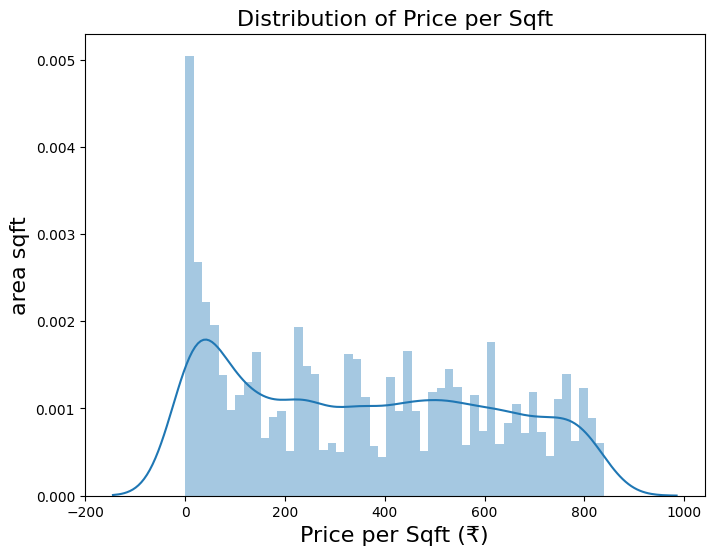

In [50]:
# Distribution of price_per_sqft
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df.get("price"), bins = 50, kde=True)
plt.title('Distribution of Price per Sqft', fontsize=16)
plt.xlabel('Price per Sqft (₹)', fontsize=16)
plt.ylabel('area sqft', fontsize=16)
plt.show()


In [51]:
df['Price2'] = (df['square_feet'] * df['price_per_sqft'] / 1000000).round(2)

In [52]:
df.drop(["price"], axis=1, inplace=True)
df

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,price_per_sqft,Price2
0,705,1,1145,23,129,115,72,173,2891,3.31
1,658,4,194,23,108,134,72,156,3551,0.69
2,819,4,120,30,136,118,65,54,3800,0.46
3,744,1,1181,23,136,134,72,54,3966,4.68
4,816,4,173,25,93,214,10,12,3600,0.62
...,...,...,...,...,...,...,...,...,...,...
4520,1963,1,562,23,102,117,72,155,9425,5.30
4521,1758,4,912,23,101,121,72,155,9425,8.60
4522,1899,1,641,23,101,146,72,98,9425,6.04
4523,1961,1,897,23,136,150,72,99,9425,8.45


# **Model Evaluation**

In [53]:
# Separate features (X) and target variable (y)
X = df.drop('Price2', axis=1)   # All columns except the target
y = df['Price2']                # The column we want to predict

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model using the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Generate predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance using Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("--- Linear Regression Results ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

--- Linear Regression Results ---
Mean Squared Error (MSE): 27.32
R-squared (R2): 0.22


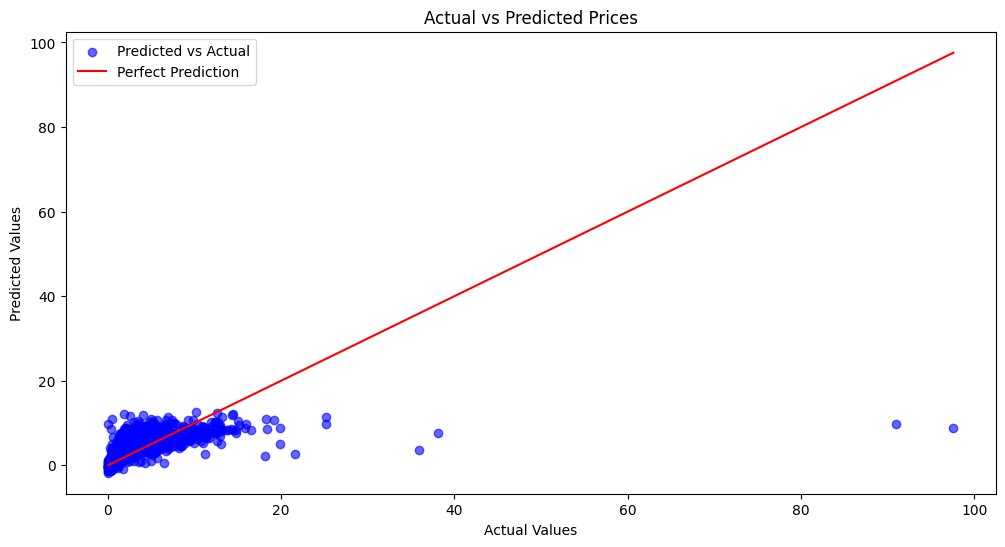

In [54]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label="Perfect Prediction")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()